Пока без промежуточных и общего выводов т.к. мне кажется, что все не правильно. 
Когда вернется с проверки, тогда все исправлю и добавлю выводы.

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv("C:/Users/marin/Downloads/real_estate_data.csv", sep= '\t')

In [3]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

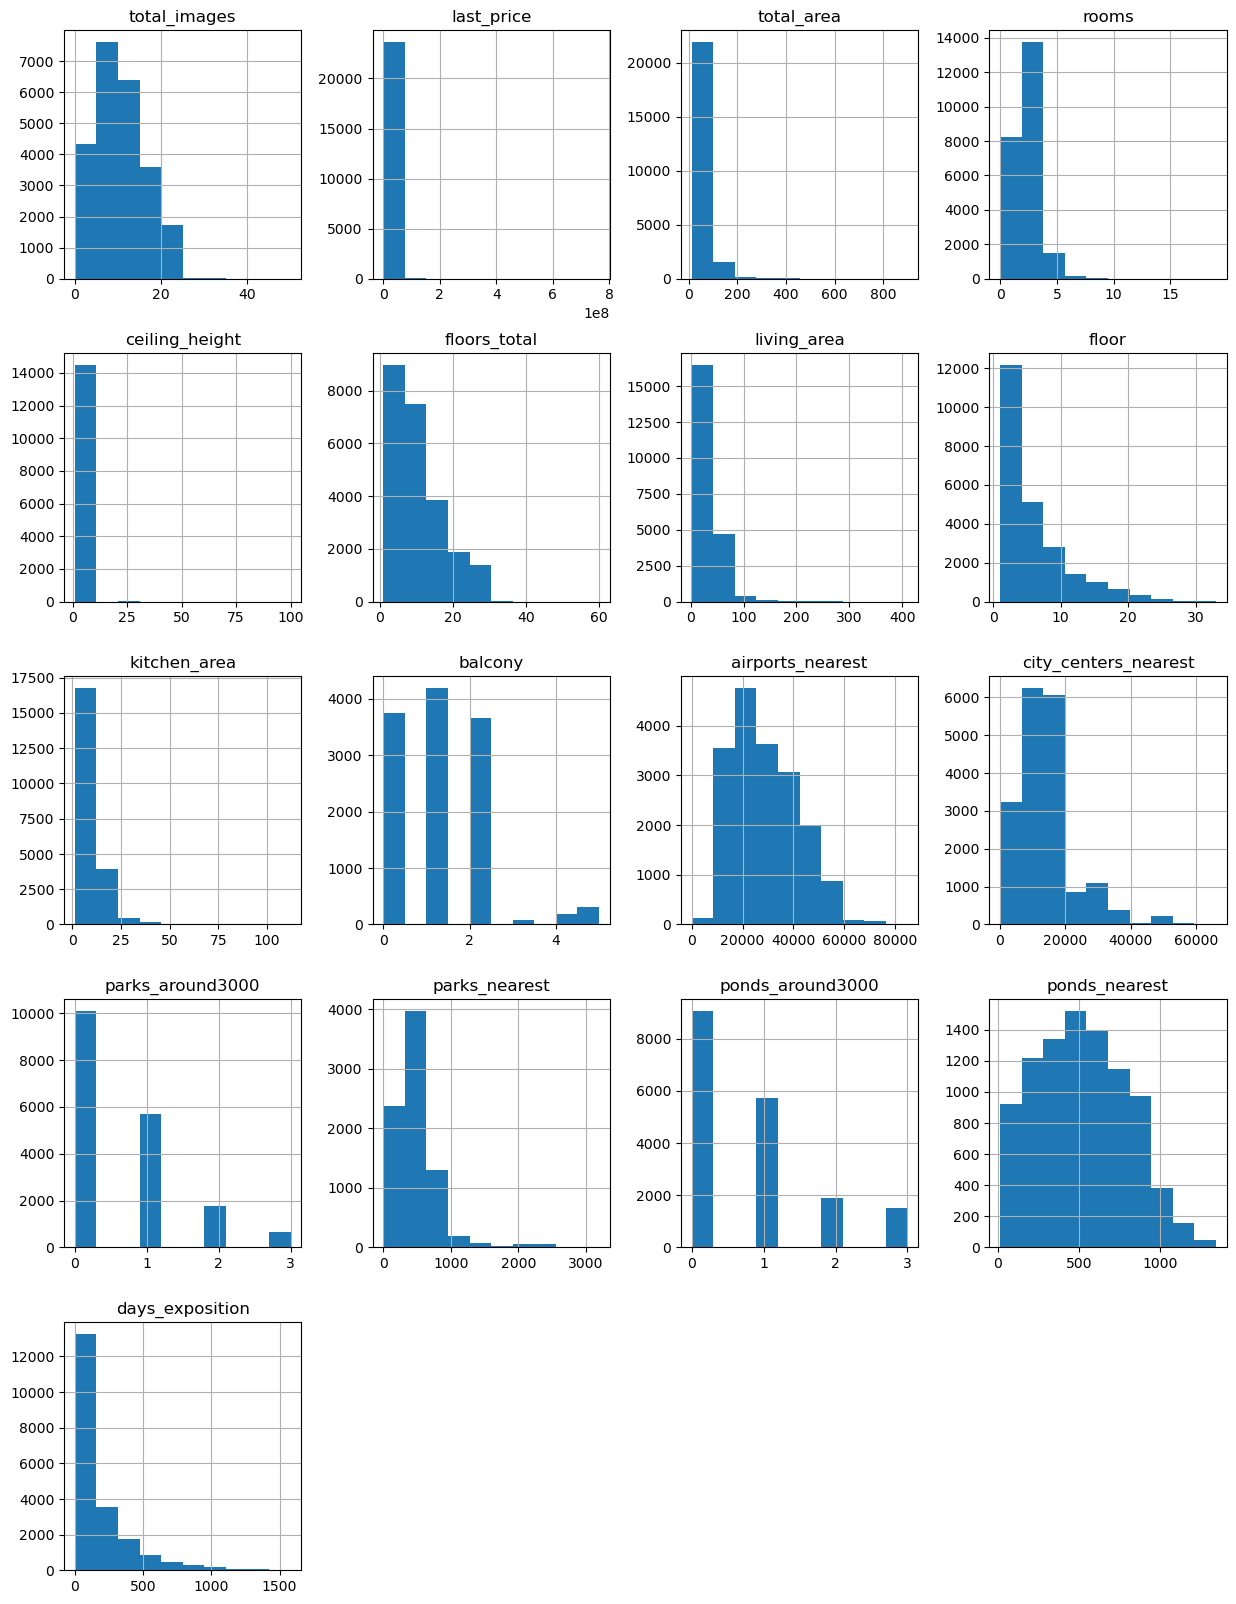

In [6]:
data.hist(figsize=(15, 20))

In [7]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [8]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [9]:
def change_median(col):
    med = data[col].median()
    data[col] = data[col].fillna(med)

In [10]:
change_median('ceiling_height')
change_median('floors_total')
change_median('living_area')
change_median('kitchen_area')
change_median('days_exposition')

In [11]:
def change_null(col):
    data[col] = data[col].fillna(0)

In [12]:
change_null('balcony')
change_null('parks_around3000')
change_null('ponds_around3000')

In [13]:
data['is_apartment'].fillna(False)

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

In [14]:
data = data.dropna(subset=['locality_name'])

In [15]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.883298
parks_nearest           0.659027
ponds_nearest           0.615856
airports_nearest        0.233996
city_centers_nearest    0.233023
total_images            0.000000
kitchen_area            0.000000
ponds_around3000        0.000000
parks_around3000        0.000000
locality_name           0.000000
balcony                 0.000000
open_plan               0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
living_area             0.000000
floors_total            0.000000
ceiling_height          0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
days_exposition         0.000000
dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,NaN,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,9.10,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,95.0
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.0,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


изменил тип

In [18]:
def change_type(col):
    data[col] = data[col].astype('int64')

In [19]:
change_type('last_price')
change_type('floors_total')

change_type('parks_around3000')
change_type('ponds_around3000')

change_type('days_exposition')
change_type('balcony')

убрал время

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [21]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,NaN,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [23]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

убрал дубликаты

In [24]:
data['locality_name'] = data['locality_name'].replace('ё', 'е',  regex=True)
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок городского типа',  regex=True)

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

In [26]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.669852,34.091359,5.893277,10.425715,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,169.222748
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.583725,21.169359,4.883317,5.628088,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,206.550577
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,41.037500,8.000000,11.427500,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_area







array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'city_centers_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

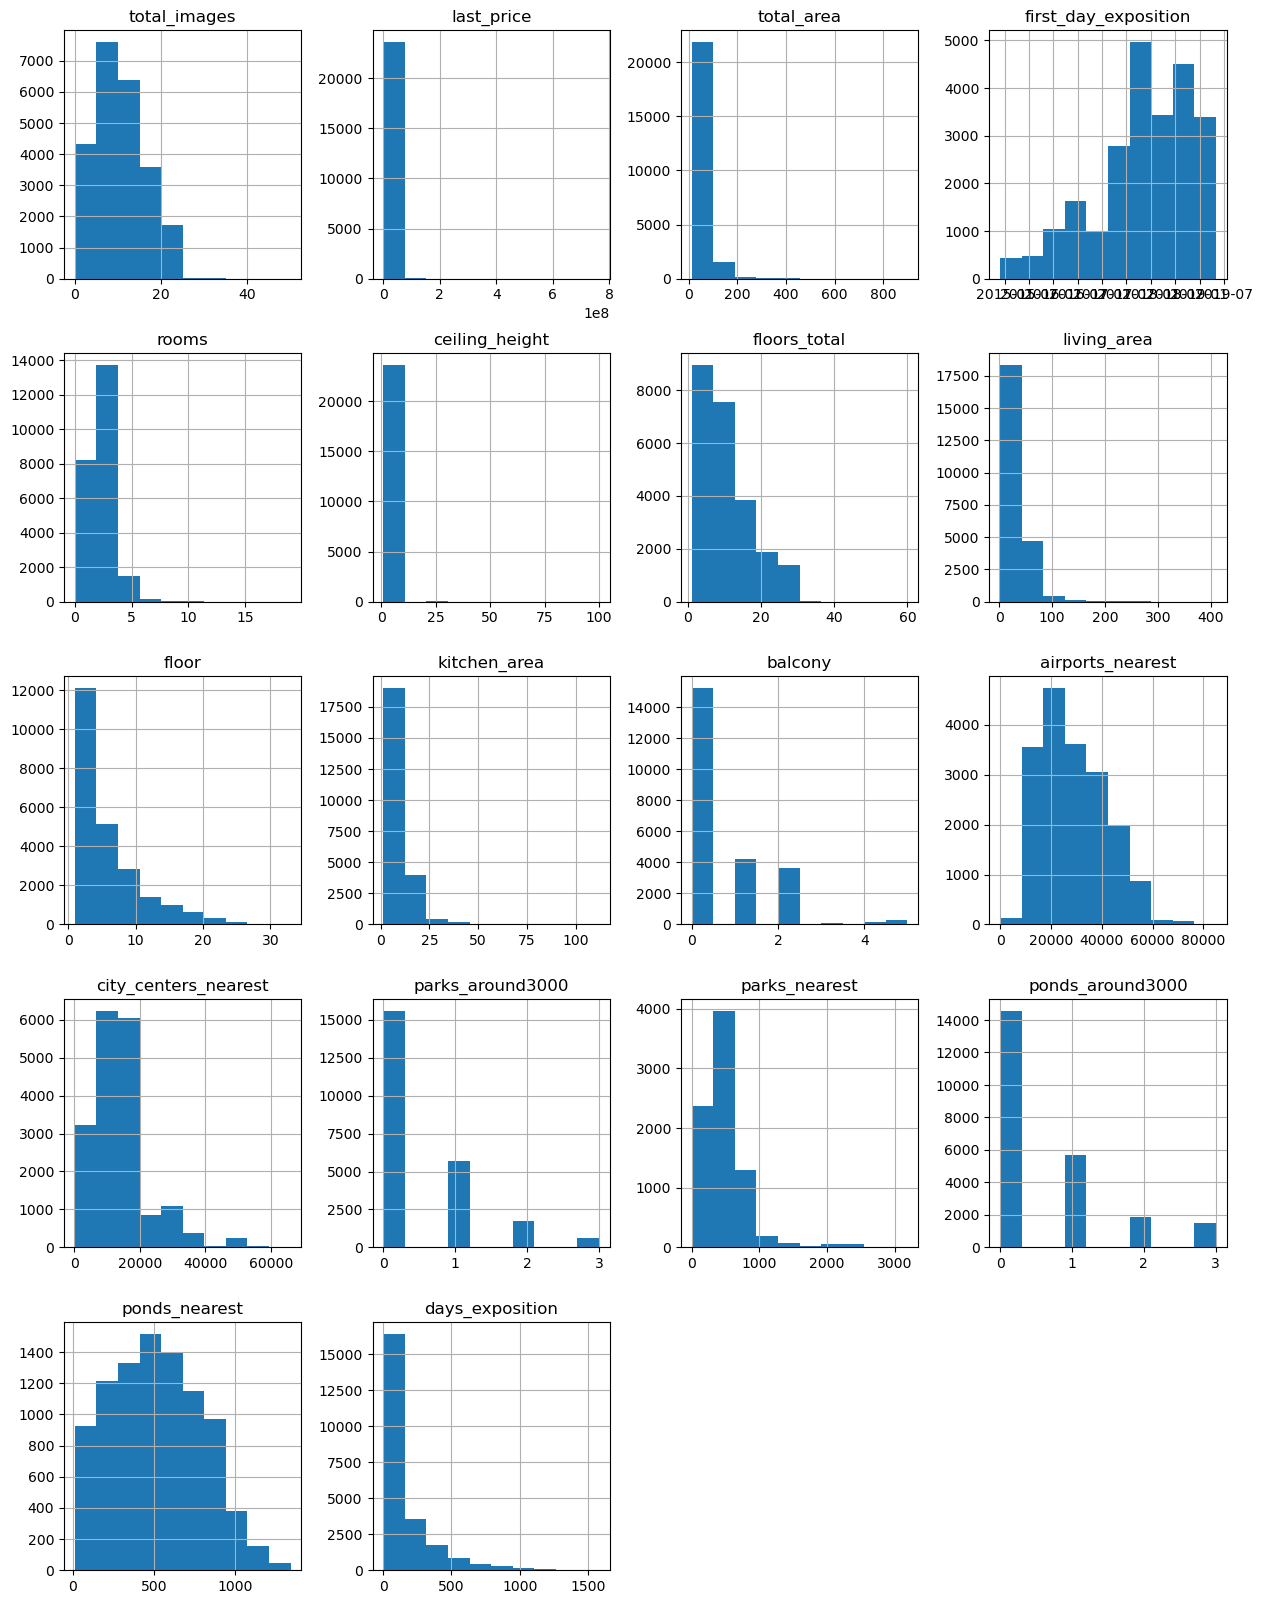

In [27]:
data.hist(figsize=(15, 20))

убрал аномальные значения

In [28]:
data = data[data['total_area'] < 300]
data = data[data['ceiling_height'] < 4]
data = data[data['rooms'] < 10]
data = data[data['living_area'] < 200]
data = data[data['kitchen_area'] < 50]
data = data[data['last_price'] <= 170000000]

добавил столбцы

In [29]:
data['price_one_metr'] = data['last_price'] / data['total_area']

In [30]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [31]:
data['month'] = data['first_day_exposition'].dt.month

In [32]:
data['year'] = data['first_day_exposition'].dt.year

In [33]:
def type_floor(row):
 
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


In [34]:
data['type_floor'] = data.apply(type_floor, axis=1) 

In [35]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,weekday,month,year,type_floor,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2,755.0,95,120370.370370,3,3,2019,другой,16.028
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,13.933
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,NaN,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,6.800
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3,381.0,95,72490.845228,1,3,2017,другой,4.232
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,NaN,...,NaN,0,NaN,45,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,NaN,...,NaN,0,NaN,95,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.0,12,NaN,...,173.0,3,196.0,602,149511.400651,1,3,2017,другой,10.364


array([[<Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'last_price'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_total'}>],
       [<Axes: title={'center': 'city_centers_nearest'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

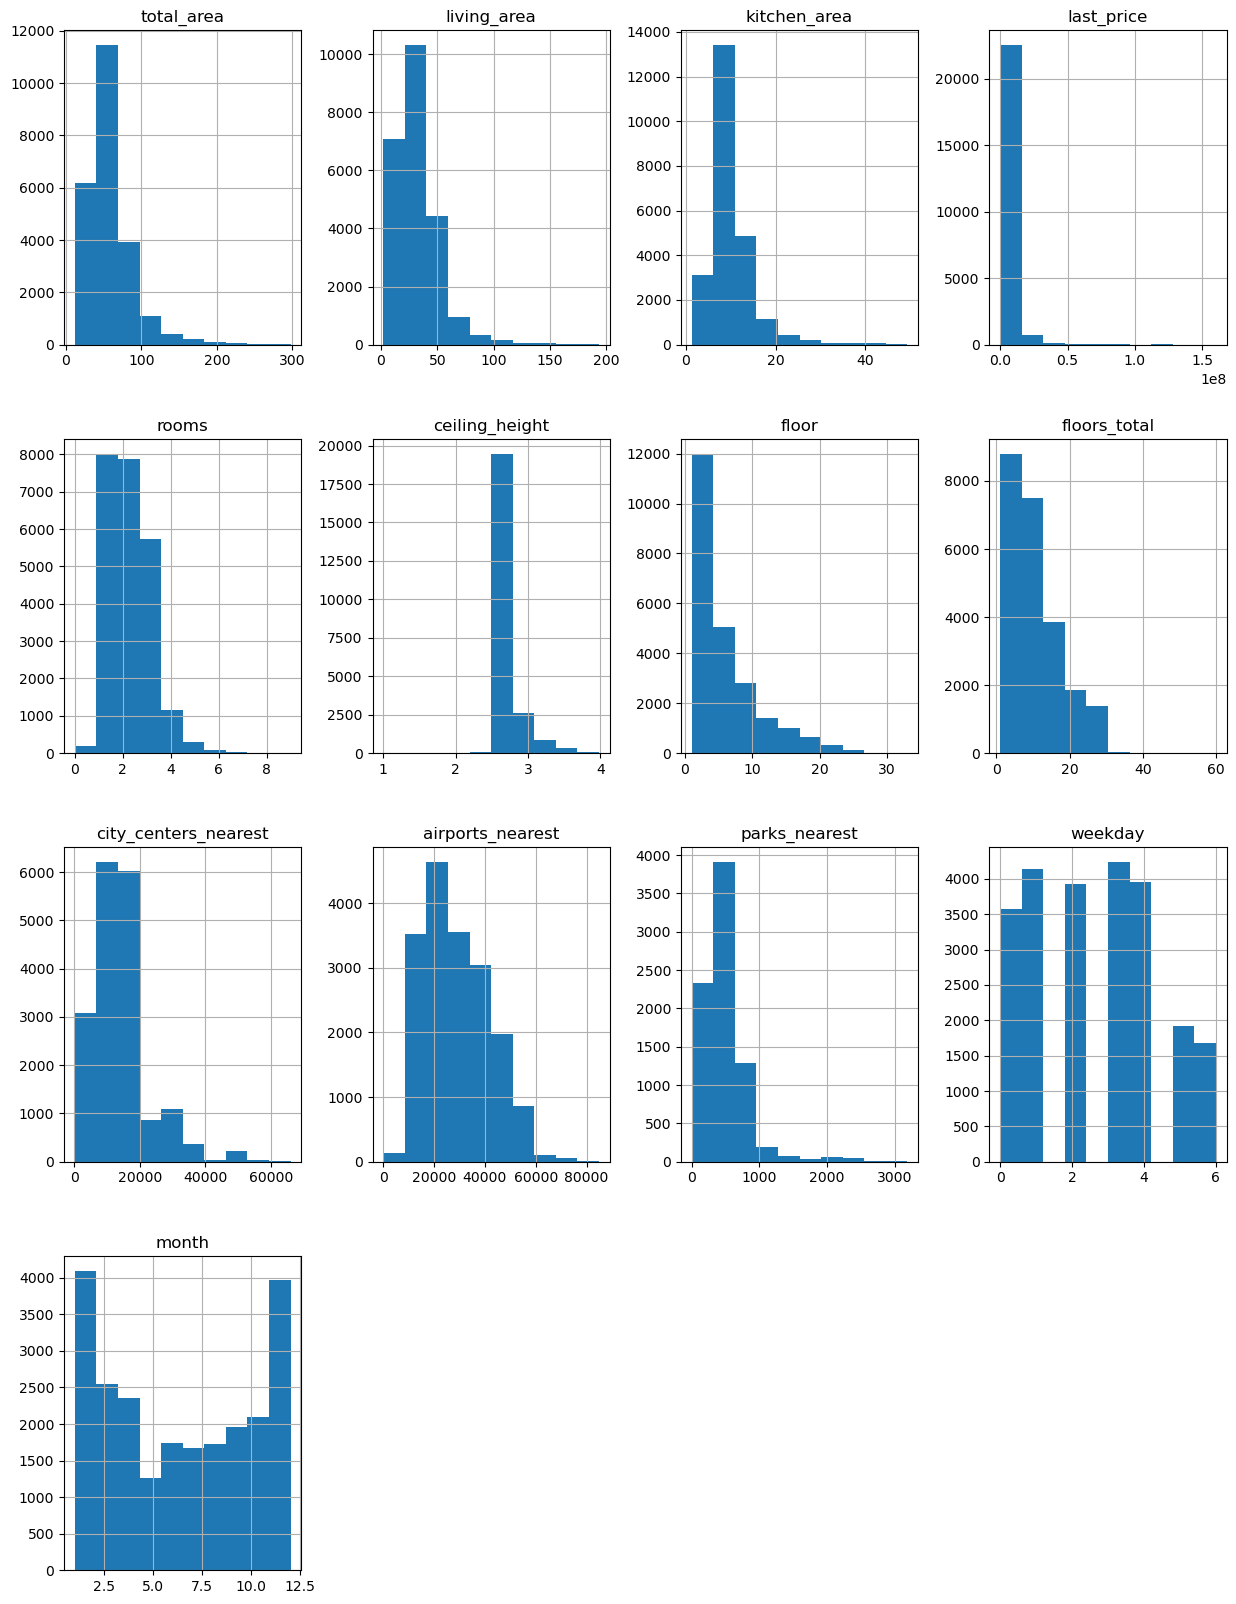

In [36]:
data[['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floor','type_floor','floors_total','city_centers_nearest','airports_nearest','parks_nearest','weekday','month']].hist(figsize=(15, 20))

In [37]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,weekday,month,year,type_floor,city_centers_nearest_km
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,NaN,...,NaN,0,NaN,181,90740.740741,3,3,2017,другой,NaN
349,4,2320000,25.00,2017-09-27,0,2.65,14,17.00,1,NaN,...,NaN,0,NaN,45,92800.000000,2,9,2017,первый,NaN
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.75,4,NaN,...,NaN,2,982.0,64,91479.158982,0,3,2018,другой,15.015
508,0,3375000,34.40,2017-03-28,0,2.65,26,24.30,19,NaN,...,NaN,1,593.0,430,98110.465116,1,3,2017,другой,19.292
608,2,1850000,25.00,2019-02-20,0,2.65,10,30.00,7,NaN,...,NaN,0,NaN,29,74000.000000,2,2,2019,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25,18.00,16,NaN,...,NaN,1,623.0,14,123076.923077,4,9,2017,другой,13.222
23442,0,2500000,27.70,2017-09-28,0,2.65,24,18.00,4,NaN,...,NaN,0,NaN,4,90252.707581,3,9,2017,другой,NaN
23554,15,3350000,26.00,2018-09-07,0,2.65,19,30.00,8,NaN,...,NaN,2,112.0,31,128846.153846,4,9,2018,другой,17.092
23592,10,1450000,29.00,2017-11-11,0,2.65,9,18.00,8,NaN,...,NaN,0,NaN,82,50000.000000,5,11,2017,другой,NaN


In [38]:
data[['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floor','type_floor','floors_total','city_centers_nearest','airports_nearest','parks_nearest','weekday','month']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,weekday,month
count,23422.000000,23422.000000,23422.000000,2.342200e+04,23422.000000,23422.000000,23422.000000,23422.000000,17934.000000,17914.000000,7925.000000,23422.000000,23422.000000
mean,58.924422,33.427223,10.249290,6.124695e+06,2.048971,2.689249,5.903979,10.707753,14271.805007,28824.407558,491.604795,2.568611,6.401631
std,29.314668,18.327124,4.849235,6.376513e+06,1.023502,0.195613,4.890427,6.588033,8586.216324,12672.667352,343.224914,1.789571,3.490457
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,19.000000,7.300000,3.400000e+06,1.000000,2.600000,2.000000,5.000000,9415.250000,18519.000000,288.000000,1.000000,3.000000
50%,52.000000,30.000000,9.100000,4.600000e+06,2.000000,2.650000,4.000000,9.000000,13149.000000,26811.000000,455.000000,3.000000,6.000000
75%,69.000000,41.000000,11.325000,6.700000e+06,3.000000,2.700000,8.000000,16.000000,16324.250000,37364.000000,613.000000,4.000000,10.000000
max,297.500000,193.500000,49.400000,1.600000e+08,9.000000,3.980000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


In [39]:
data['weekday'].value_counts()

3    4233
1    4136
4    3957
2    3928
0    3575
5    1915
6    1678
Name: weekday, dtype: int64

In [40]:
data['month'].value_counts()

2     2616
3     2549
4     2352
11    2346
10    2100
9     1962
6     1742
8     1730
7     1669
12    1619
1     1475
5     1262
Name: month, dtype: int64

Общая площадь. Среднее значение - 58.9 кв. м, медианное значение - 52 кв. м. 
Жилая площадь. Среднее значение - 33.4 кв. м, медианное значение - 30 кв. м. 
Площадь кухни. Среднее значение - 10.2 кв. м, медианное значение - 9.1 кв. м. 
Стоимость. Среднее значение - 6.1 млн р, медианное значение - 4.6 млн р. 
Комнтаты. Среднее значение - 2 комнаты, медианное значение - 2 комнаты 
высота потолков. Среднее значение - 2.6 м, медианное значение - 2.6 м. 
Этаж. Среднее значение - 6 этаж, медианное значение - 4 этаж
Всего этажей. Среднее значение - 11 этажей, медианное значение - 9 этажей. 
Расстояние до центра. Среднее значение - 14.2 км, медианное значение - 13.1 км. 
расстояние до аэропорта. Среднее значение - 28.8 км, медианное значение - 26.8 км. 
расстояние до парка. Среднее значение - 491 м, медианное значение - 455 м. 
Чаще всего публикуют объявления в четверг, реже вего в воскресение
Чаще всего публикуют объявления в феврале, реже вего в мае

<Axes: >

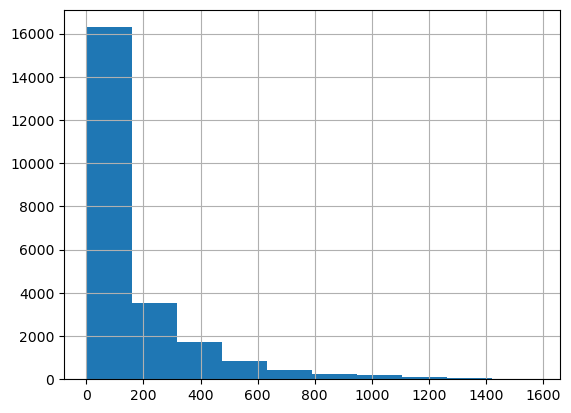

In [41]:
data['days_exposition'].hist()

In [42]:
data['days_exposition'].mean()

168.53197848176927

In [43]:
data['days_exposition'].median()

95.0

In [44]:
data['days_exposition'].describe()

count    23422.000000
mean       168.531978
std        205.808006
min          1.000000
25%         45.000000
50%         95.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются 186 дней. 
Если квартиру удалось продать быстрее 45 дней, то такую продажу можно читать быстрой. 
А если квартира продавалась дольше 197, то это очень долго, пора редактировать объявление.

  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

In [45]:
data[['last_price', 'total_area','living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.722275,0.598039,0.489711,0.433879
total_area,0.722275,1.000000,0.885233,0.549787,0.787118
living_area,0.598039,0.885233,1.000000,0.359723,0.829718
kitchen_area,0.489711,0.549787,0.359723,1.000000,0.219889
rooms,0.433879,0.787118,0.829718,0.219889,1.000000


In [46]:
data['new_last_price'] = data['last_price'] / 1000000

<Axes: xlabel='total_area', ylabel='new_last_price'>

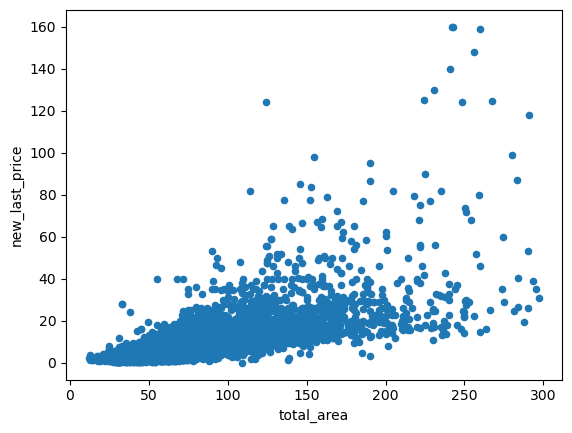

In [47]:
data.sort_values('new_last_price').plot(x='total_area', y='new_last_price', kind='scatter')

<Axes: xlabel='living_area', ylabel='new_last_price'>

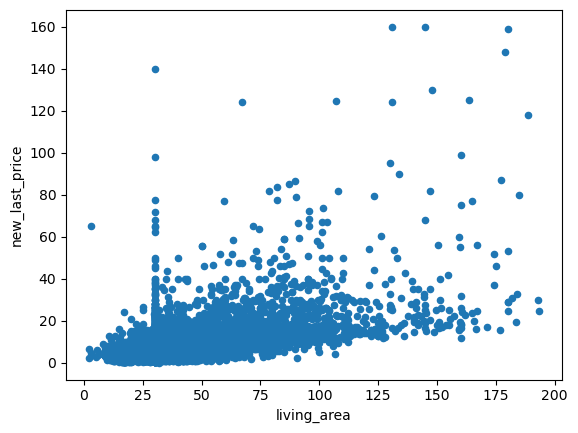

In [48]:
data.sort_values('new_last_price').plot(x='living_area', y='new_last_price', kind='scatter')

<Axes: xlabel='kitchen_area', ylabel='new_last_price'>

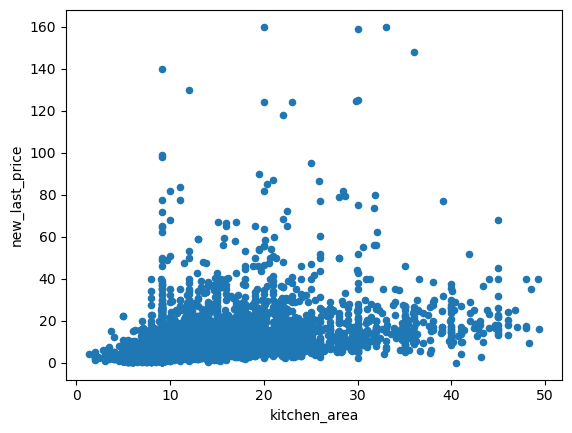

In [49]:
data.sort_values('new_last_price').plot(x='kitchen_area', y='new_last_price', kind='scatter')

<Axes: xlabel='rooms', ylabel='new_last_price'>

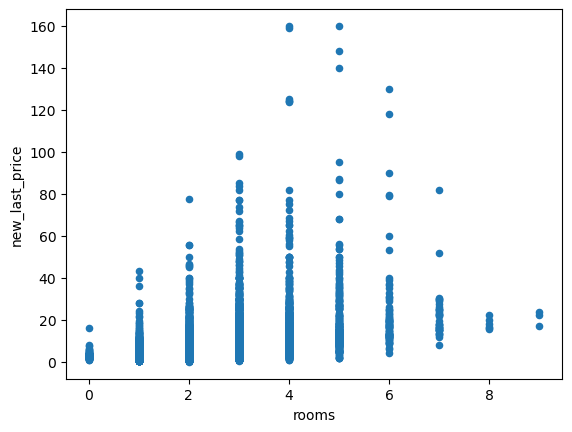

In [50]:
data.sort_values('new_last_price').plot(x='rooms', y='new_last_price', kind='scatter')

<Axes: xlabel='type_floor'>

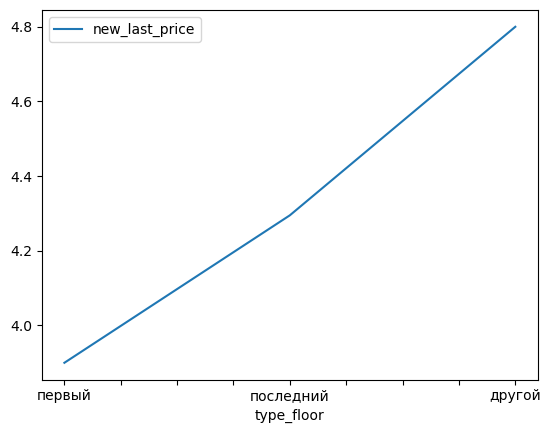

In [51]:
data.pivot_table(index='type_floor', values='new_last_price', aggfunc='median').sort_values('new_last_price').plot()

<Axes: xlabel='year'>

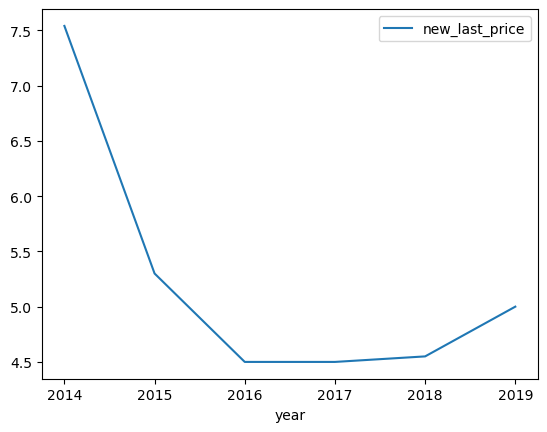

In [52]:
data.pivot_table(index='year', values='new_last_price', aggfunc='median').plot()

<Axes: xlabel='month'>

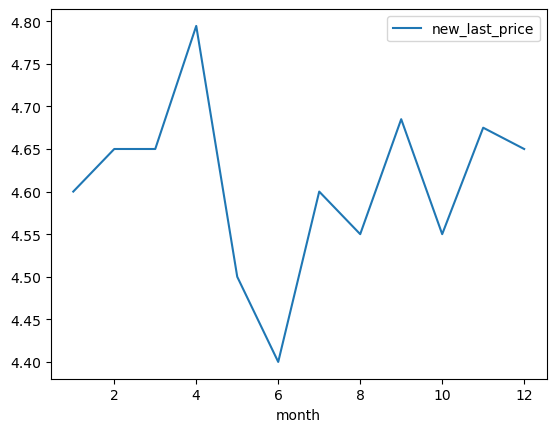

In [53]:
data.pivot_table(index='month', values='new_last_price', aggfunc='median').plot()

<Axes: xlabel='weekday'>

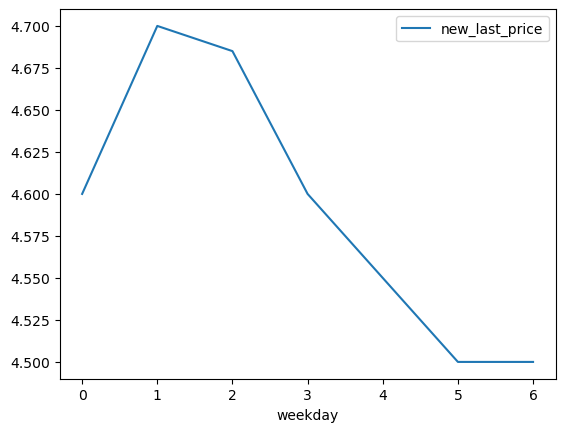

In [54]:
data.pivot_table(index='weekday', values='new_last_price', aggfunc='median').plot()

In [55]:
data.pivot_table(index='locality_name', values='price_one_metr', aggfunc=('count', 'mean')).sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15524,113350.512266
поселок Мурино,553,85655.173383
поселок Шушары,440,78677.364217
Всеволожск,396,68552.143144
Пушкин,363,102860.753273
Колпино,337,75333.295801
поселок Парголово,327,90175.913458
Гатчина,305,68811.372828
деревня Кудрово,299,92473.547576


In [56]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='last_price', values='city_centers_nearest', aggfunc='mean')

,city_centers_nearest
last_price,
12190,9176.0
1190000,11122.0
1200000,12313.0
1350000,14479.0
1400000,15945.0
...,...
140000000,3503.0
148000000,3639.0
159000000,436.0


In [57]:
kek = data['last_price'][data['locality_name'] == 'Санкт-Петербург'] / data['city_centers_nearest_km'][data['locality_name'] == 'Санкт-Петербург']

In [58]:
kek.mean()

1301557.3015292636